##Xử lý từ đầu tới cột daily

#Import thư viện và dữ liệu

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Brandhealth = pd.read_csv('/content/Brandhealth.csv',sep="," )

/tmp/ipython-input-2-2207477923.py:1: DtypeWarning: Columns (4,7,8,10,11,12,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  Brandhealth = pd.read_csv('/content/Brandhealth.csv',sep="," )


In [ ]:
Brandhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74419 entries, 0 to 74418
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                74419 non-null  int64  
 1   Year              74419 non-null  int64  
 2   City              74419 non-null  object 
 3   Brand             74419 non-null  object 
 4   Spontaneous       30993 non-null  object 
 5   Awareness         74305 non-null  object 
 6   Trial             47330 non-null  object 
 7   P3M               28849 non-null  object 
 8   P1M               19399 non-null  object 
 9   Comprehension     74419 non-null  int64  
 10  Brand_Likability  10331 non-null  object 
 11  Weekly            13382 non-null  object 
 12  Daily             7621 non-null   object 
 13  Fre#visit         19332 non-null  float64
 14  PPA               14073 non-null  float64
 15  Spending          14073 non-null  float64
 16  Segmentation      14073 non-null  object

#Xoá các cột từ Fre đi

In [ ]:
cols_to_drop = ['ID', 'Fre#visit', 'PPA', 'Spending', 'Segmentation', 'NPS#P3M', 'NPS#P3M#Group', 'Spending_use']
Brandhealth.drop(columns=cols_to_drop, inplace=True)

In [ ]:
Brandhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74419 entries, 0 to 74418
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                74419 non-null  int64  
 1   Year              74419 non-null  int64  
 2   City              74419 non-null  object 
 3   Brand             74419 non-null  object 
 4   Spontaneous       30993 non-null  object 
 5   Awareness         74305 non-null  object 
 6   Trial             47330 non-null  object 
 7   P3M               28849 non-null  object 
 8   P1M               19399 non-null  object 
 9   Comprehension     74419 non-null  int64  
 10  Brand_Likability  10331 non-null  object 
 11  Weekly            13382 non-null  object 
 12  Daily             7621 non-null   object 
 13  Fre#visit         19332 non-null  float64
 14  PPA               14073 non-null  float64
 15  Spending          14073 non-null  float64
 16  Segmentation      14073 non-null  object

#Tiền xử lý dữ liệu như trong sheet

Thay những thằng other1 2 3 ,... thành Other

In [ ]:
Brandhealth['Brand'] = Brandhealth['Brand'].replace(to_replace=r'^Other.*', value='Other', regex=True)
Brandhealth['Spontaneous'] = Brandhealth['Spontaneous'].replace(to_replace=r'^Other.*', value='Other', regex=True)
Brandhealth['Awareness'] = Brandhealth['Awareness'].replace(to_replace=r'^Other.*', value='Other', regex=True)
Brandhealth['Trial'] = Brandhealth['Trial'].replace(to_replace=r'^Other.*', value='Other', regex=True)
Brandhealth['P3M'] = Brandhealth['P3M'].replace(to_replace=r'^Other.*', value='Other', regex=True)
Brandhealth['P1M'] = Brandhealth['P1M'].replace(to_replace=r'^Other.*', value='Other', regex=True)
Brandhealth['Brand_Likability'] = Brandhealth['Brand_Likability'].replace(to_replace=r'^Other.*', value='Other', regex=True)
Brandhealth['Weekly'] = Brandhealth['Weekly'].replace(to_replace=r'^Other.*', value='Other', regex=True)
Brandhealth['Daily'] = Brandhealth['Daily'].replace(to_replace=r'^Other.*', value='Other', regex=True)



In [ ]:
Brandhealth['Brand'].value_counts()

,count
Brand,
Trung Nguyên,9954
Other,9733
Highlands Coffee,8520
Street / Half street coffee (including carts),7391
Milano,4699
Cộng Cà Phê,3929
The Coffee House,3830
Starbucks,3350
Street,3278


In [ ]:
#cols_to_encode = ['Brand', 'Spontaneous','Awareness', 'Trial', 'P3M', 'P1M', 'Brand_Likability', 'Weekly', 'Daily' ]  # danh sách các cột muốn mã hóa


In [ ]:

# Giả sử bạn đã có DataFrame df và cột tên là 'my_column'
unique_values = Brandhealth['Brand'].unique()

# Tạo dict ánh xạ giá trị thành số (bắt đầu từ 1)
value_to_number = {value: idx + 1 for idx, value in enumerate(unique_values)}
value_to_number["Not Applicable"] = 0
print(value_to_number)


{'Phúc Long': 1, 'Milano': 2, 'Trung Nguyên': 3, 'Starbucks': 4, 'Highlands Coffee': 5, 'Thức Coffee': 6, 'The Coffee House': 7, 'Passio': 8, 'Viva Star': 9, 'Cộng Cà Phê': 10, 'Đen Đá': 11, 'Coffee Bean & Tea Leaf': 12, 'Urban Station': 13, 'Effoc': 14, 'The Coffee Factory': 15, 'Runam cafe': 16, 'Mộc Miên': 17, 'Nia cafe': 18, 'Aha Cafe': 19, 'Street / Half street coffee (including carts)': 20, 'Other': 21, 'Long Cafe': 22, 'BonPas': 23, 'Maxx Coffee': 24, 'Indepedent Cafe': 25, 'KOI cafe': 26, 'Saigon Café': 27, 'Gong Cha': 28, 'Street': 29, 'The Cups Coffee': 30, 'Laha Coffee': 31, 'Mê Trang': 32, 'Cheese Coffee': 33, 'Not Applicable': 0}


In [ ]:
Brandhealth['Brand'] = Brandhealth['Brand'].replace(value_to_number)
Brandhealth['Spontaneous'] = Brandhealth['Spontaneous'].replace(value_to_number)
Brandhealth['Awareness'] = Brandhealth['Awareness'].replace(value_to_number)
Brandhealth['Trial'] = Brandhealth['Trial'].replace(value_to_number)
Brandhealth['P3M'] = Brandhealth['P3M'].replace(value_to_number)
Brandhealth['P1M'] = Brandhealth['P1M'].replace(value_to_number)
Brandhealth['Brand_Likability'] = Brandhealth['Brand_Likability'].replace(value_to_number)
Brandhealth['Weekly'] = Brandhealth['Weekly'].replace(value_to_number)
Brandhealth['Daily'] = Brandhealth['Daily'].replace(value_to_number)

/tmp/ipython-input-9-3634541325.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Brandhealth['Brand'] = Brandhealth['Brand'].replace(value_to_number)
/tmp/ipython-input-9-3634541325.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Brandhealth['Spontaneous'] = Brandhealth['Spontaneous'].replace(value_to_number)
/tmp/ipython-input-9-3634541325.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False

In [ ]:
Brandhealth['Brand'] = Brandhealth['Brand'].fillna(0)
Brandhealth['Spontaneous'] = Brandhealth['Spontaneous'].fillna(0)
Brandhealth['Awareness'] = Brandhealth['Awareness'].fillna(0)
Brandhealth['Trial'] = Brandhealth['Trial'].fillna(0)
Brandhealth['P3M'] = Brandhealth['P3M'].fillna(0)
Brandhealth['P1M'] = Brandhealth['P1M'].fillna(0)
Brandhealth['Brand_Likability'] = Brandhealth['Brand_Likability'].fillna(0)
Brandhealth['Weekly'] = Brandhealth['Weekly'].fillna(0)
Brandhealth['Daily'] = Brandhealth['Daily'].fillna(0)

CHuyển có chữ thành 1, không chữ thành 0 (Giữ nguyên Brand, Comprehension)

In [ ]:
Brandhealth['Spontaneous'] = Brandhealth['Spontaneous'].notna().astype(int)
Brandhealth['Awareness'] = Brandhealth['Awareness'].notna().astype(int)
Brandhealth['Trial'] = Brandhealth['Trial'].notna().astype(int)
Brandhealth['P3M'] = Brandhealth['P3M'].notna().astype(int)
Brandhealth['P1M'] = Brandhealth['P1M'].notna().astype(int)
Brandhealth['Brand_Likability'] = Brandhealth['Brand_Likability'].notna().astype(int)
Brandhealth['Weekly'] = Brandhealth['Weekly'].notna().astype(int)
Brandhealth['Daily'] = Brandhealth['Daily'].notna().astype(int)

Chuyển kiểu dữ liệu của cột Comprehension sang số

In [ ]:
mapping = {
    'Do not know it at all': 1,
    'Maybe do not know it': 2,
    'Know a little': 3,
    'Know it well': 4,
    'Know it very well': 5
}

Brandhealth['Comprehension'] = Brandhealth['Comprehension'].map(mapping)


In [ ]:
Brandhealth['Comprehension'].unique()

array([nan,  3.,  2.,  4.,  1.,  5.])

In [ ]:
Brandhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74419 entries, 0 to 74418
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              74419 non-null  int64  
 1   City              74419 non-null  object 
 2   Brand             74419 non-null  int64  
 3   Spontaneous       74419 non-null  float64
 4   Awareness         74419 non-null  float64
 5   Trial             74419 non-null  float64
 6   P3M               74419 non-null  float64
 7   P1M               74419 non-null  float64
 8   Comprehension     26346 non-null  float64
 9   Brand_Likability  74419 non-null  float64
 10  Weekly            74419 non-null  float64
 11  Daily             74419 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 6.8+ MB


In [ ]:
Brandhealth.to_csv('Brandhealth_processed.csv', index=False)
##Checkpoint

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

=== ĐANG TẢI DỮ LIỆU ===
Dữ liệu đã tải thành công!
Shape: (74419, 12)
Các cột: ['Year', 'City', 'Brand', 'Spontaneous', 'Awareness', 'Trial', 'P3M', 'P1M', 'Comprehension', 'Brand_Likability', 'Weekly', 'Daily']

=== THÔNG TIN DỮ LIỆU ===
Số lượng NaN trong Comprehension: 48073
Tỷ lệ NaN: 64.60%

Phân phối Comprehension (trước khi điền khuyết):
Comprehension
1.0      127
2.0     4698
3.0    10517
4.0     7096
5.0     3908
Name: count, dtype: int64

Kiểu dữ liệu các cột:
Year                  int64
City                 object
Brand                 int64
Spontaneous         float64
Awareness           float64
Trial               float64
P3M                 float64
P1M                 float64
Comprehension       float64
Brand_Likability    float64
Weekly              float64
Daily               float64
dtype: object

Mẫu dữ liệu đầu tiên:
   Year         City  Brand  Spontaneous  Awareness  Trial  P3M  P1M  \
0  2018  Hồ Chí Minh      1          0.0        1.0    0.0  0.0  0.0   
1  2018

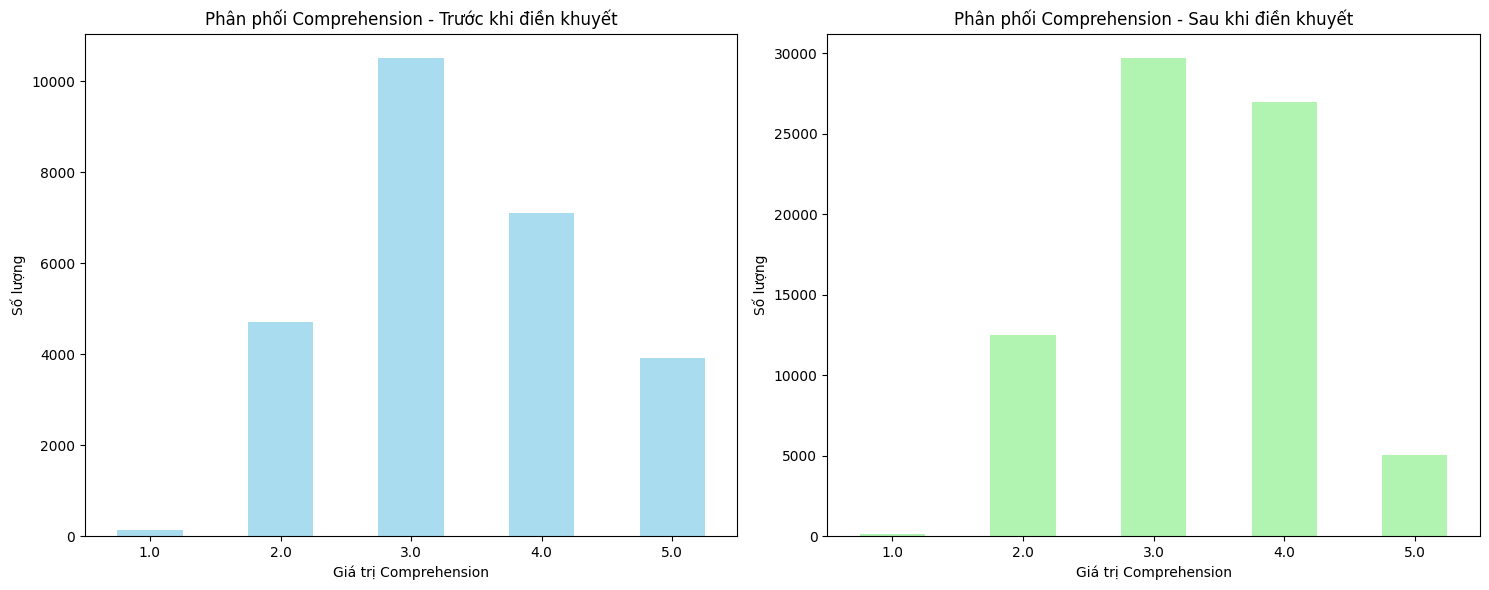


=== ĐÁNH GIÁ CHẤT LƯỢNG ĐIỀN KHUYẾT ===
Sử dụng 10 features số để tính correlation

Tương quan giữa Comprehension và các biến số:
Biến		Trước		Sau		Chênh lệch
------------------------------------------------------------
Year           	0.0000		-0.0088		0.0088
Brand          	0.2430		0.3204		0.0773
Spontaneous    	0.4829		0.4958		0.0129
Awareness      	0.2432		0.3213		0.0782
Trial          	0.4508		0.4727		0.0219
P3M            	0.4872		0.4982		0.0110
P1M            	0.4690		0.4487		0.0203
Brand_Likability	0.4987		0.3238		0.1749
Weekly         	0.3827		0.3595		0.0232
Daily          	0.1754		0.1932		0.0178

=== THÔNG TIN MÃ HÓA ===
City: 6 categories
  Categories: ['Cần Thơ', 'Hà Nội', 'Hải Phòng', 'Hồ Chí Minh', 'Nha Trang', 'Đà Nẵng']

=== LƯU KẾT QUẢ ===
Đã lưu kết quả vào: /content/Brandhealth_imputed.csv

Mẫu dữ liệu sau khi xử lý:
   Comprehension
0            2.0
1            2.0
2            2.0
3            2.0
4            2.0
5            2.0
6            2.0
7            2.0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# ĐỌC DỮ LIỆU THỰC
print("=== ĐANG TẢI DỮ LIỆU ===")
df = pd.read_csv('/content/Brandhealth_processed.csv', sep=",")

print(f"Dữ liệu đã tải thành công!")
print(f"Shape: {df.shape}")
print(f"Các cột: {list(df.columns)}")

# KIỂM TRA DỮ LIỆU BAN ĐẦU
print(f"\n=== THÔNG TIN DỮ LIỆU ===")
print(f"Số lượng NaN trong Comprehension: {df['Comprehension'].isna().sum()}")
print(f"Tỷ lệ NaN: {df['Comprehension'].isna().sum() / len(df) * 100:.2f}%")

print(f"\nPhân phối Comprehension (trước khi điền khuyết):")
comprehension_counts = df['Comprehension'].value_counts().sort_index()
print(comprehension_counts)

print(f"\nKiểu dữ liệu các cột:")
print(df.dtypes)

print(f"\nMẫu dữ liệu đầu tiên:")
print(df.head())

# HÀMM CHÍNH ĐỂ ÁP DỤNG KNN IMPUTATION
def apply_knn_imputation_to_real_data(df, target_column='Comprehension', k=5):
    """
    Hàm để áp dụng KNN imputation cho dữ liệu thực sử dụng TẤT CẢ features

    Parameters:
    - df: DataFrame chứa dữ liệu
    - target_column: tên cột cần điền khuyết
    - k: số neighbors trong KNN

    Returns:
    - DataFrame đã được điền khuyết
    - Dictionary chứa label encoders (để decode nếu cần)
    """

    print(f"\n=== BẮT ĐẦU KNN IMPUTATION ===")

    # Tạo bản sao
    df_work = df.copy()

    # Định nghĩa tất cả features (loại bỏ target column)
    all_columns = df_work.columns.tolist()
    available_features = [col for col in all_columns if col != target_column]

    print(f"Sử dụng {len(available_features)} features: {available_features}")

    # Tạo dataframe làm việc
    df_for_knn = df_work[available_features + [target_column]].copy()

    # Mã hóa các biến categorical
    label_encoders = {}
    categorical_features = []

    # Xác định các biến categorical
    for feature in available_features:
        if df_for_knn[feature].dtype == 'object':
            categorical_features.append(feature)

    print(f"Phát hiện {len(categorical_features)} biến categorical: {categorical_features}")

    # Áp dụng label encoding
    for feature in categorical_features:
        print(f"Đang mã hóa {feature}...")
        le = LabelEncoder()

        # Xử lý các giá trị NaN trước khi encode
        non_null_mask = df_for_knn[feature].notna()
        if non_null_mask.sum() > 0:  # Nếu có ít nhất 1 giá trị không null
            # Chuyển về string và encode
            unique_values = df_for_knn.loc[non_null_mask, feature].astype(str).unique()
            print(f"  - {feature} có {len(unique_values)} giá trị unique: {unique_values[:5]}...")

            df_for_knn.loc[non_null_mask, feature] = le.fit_transform(
                df_for_knn.loc[non_null_mask, feature].astype(str)
            )
            label_encoders[feature] = le
        else:
            # Nếu toàn bộ cột là NaN, đặt về 0
            df_for_knn[feature] = 0
            print(f"  - {feature} toàn bộ là NaN, đặt về 0")

    # Kiểm tra dữ liệu sau khi mã hóa
    print(f"\nKiểu dữ liệu sau khi mã hóa:")
    print(df_for_knn.dtypes)

    # Kiểm tra có NaN nào trong features không
    nan_counts = df_for_knn[available_features].isna().sum()
    features_with_nan = nan_counts[nan_counts > 0]
    if len(features_with_nan) > 0:
        print(f"\nCảnh báo: Các features có NaN: {features_with_nan.to_dict()}")
        # Điền NaN trong features bằng giá trị trung bình/mode
        for feature in features_with_nan.index:
            if df_for_knn[feature].dtype in ['int64', 'float64']:
                df_for_knn[feature].fillna(df_for_knn[feature].mean(), inplace=True)
            else:
                df_for_knn[feature].fillna(df_for_knn[feature].mode()[0], inplace=True)
        print("Đã điền NaN trong features bằng mean/mode")

    # Chuẩn hóa dữ liệu
    print(f"\nĐang chuẩn hóa dữ liệu...")
    scaler = StandardScaler()
    df_scaled = df_for_knn.copy()
    df_scaled[available_features] = scaler.fit_transform(df_for_knn[available_features])

    # Áp dụng KNN Imputation
    print(f"Áp dụng KNN với k={k} neighbors...")
    knn_imputer = KNNImputer(n_neighbors=k, weights='uniform')

    try:
        df_imputed_values = knn_imputer.fit_transform(df_scaled)

        # Lấy cột target đã được điền khuyết
        target_col_index = df_scaled.columns.get_loc(target_column)
        target_imputed = df_imputed_values[:, target_col_index]

        # Làm tròn và clip về khoảng 1-5
        target_imputed = np.round(target_imputed)
        target_imputed = np.clip(target_imputed, 1, 5)

        # Cập nhật dataframe gốc
        df_work[target_column] = target_imputed

        print(f"KNN Imputation hoàn thành thành công!")

    except Exception as e:
        print(f"Lỗi trong quá trình KNN: {e}")
        return None, None

    return df_work, label_encoders

# Kiểm tra chất lượng của việc điền khuyết
def evaluate_imputation_quality(original, imputed, features):
    """
    Đánh giá chất lượng việc điền khuyết
    """
    print("\n=== ĐÁNH GIÁ CHẤT LƯỢNG ĐIỀN KHUYẾT ===")

    try:
        # Chỉ sử dụng các features số để tính correlation
        numeric_features = []
        for feature in features:
            if feature in original.columns and feature in imputed.columns:
                # Kiểm tra xem cột có phải là số không
                if pd.api.types.is_numeric_dtype(original[feature]) and pd.api.types.is_numeric_dtype(imputed[feature]):
                    numeric_features.append(feature)

        if not numeric_features:
            print("Không có features số để tính correlation.")
            return

        print(f"Sử dụng {len(numeric_features)} features số để tính correlation")

        # Tính correlation matrix trước và sau khi điền khuyết (chỉ với features số)
        if len(numeric_features) > 0:
            corr_before = original[numeric_features + ['Comprehension']].corr()['Comprehension'].drop('Comprehension')
            corr_after = imputed[numeric_features + ['Comprehension']].corr()['Comprehension'].drop('Comprehension')

            print("\nTương quan giữa Comprehension và các biến số:")
            print("Biến\t\tTrước\t\tSau\t\tChênh lệch")
            print("-" * 60)
            for feature in numeric_features:
                before = corr_before[feature] if not pd.isna(corr_before[feature]) else 0
                after = corr_after[feature] if not pd.isna(corr_after[feature]) else 0
                diff = abs(after - before)
                print(f"{feature:<15}\t{before:.4f}\t\t{after:.4f}\t\t{diff:.4f}")

    except Exception as e:
        print(f"Lỗi khi tính correlation: {e}")
        print("Bỏ qua đánh giá correlation.")

# ÁP DỤNG KNN IMPUTATION
print(f"\n" + "="*60)
print("BẮT ĐẦU QUÁ TRÌNH ĐIỀN KHUYẾT")
print("="*60)

# Áp dụng KNN với k=5
df_imputed, label_encoders_used = apply_knn_imputation_to_real_data(df, k=5)

if df_imputed is not None:
    # HIỂN THỊ KẾT QUẢ
    print(f"\n=== KẾT QUẢ CUỐI CÙNG ===")
    print(f"Số lượng NaN trong Comprehension sau khi điền khuyết: {df_imputed['Comprehension'].isna().sum()}")

    print(f"\nPhân phối Comprehension sau khi điền khuyết:")
    final_counts = df_imputed['Comprehension'].value_counts().sort_index()
    print(final_counts)

    # So sánh trước và sau
    print(f"\n=== SO SÁNH TRƯỚC VÀ SAU ===")
    comparison_df = pd.DataFrame({
        'Trước': comprehension_counts,
        'Sau': final_counts
    }).fillna(0)
    comparison_df['Chênh lệch'] = comparison_df['Sau'] - comparison_df['Trước']
    print(comparison_df)

    # Tạo biểu đồ so sánh
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Biểu đồ trước khi điền khuyết
    comprehension_counts.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.7)
    ax1.set_title('Phân phối Comprehension - Trước khi điền khuyết')
    ax1.set_xlabel('Giá trị Comprehension')
    ax1.set_ylabel('Số lượng')
    ax1.tick_params(axis='x', rotation=0)

    # Biểu đồ sau khi điền khuyết
    final_counts.plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7)
    ax2.set_title('Phân phối Comprehension - Sau khi điền khuyết')
    ax2.set_xlabel('Giá trị Comprehension')
    ax2.set_ylabel('Số lượng')
    ax2.tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.show()

    # Đánh giá chất lượng
    all_features = [col for col in df.columns if col != 'Comprehension']
    evaluate_imputation_quality(df, df_imputed, all_features)

    # Thông tin về label encoders
    print(f"\n=== THÔNG TIN MÃ HÓA ===")
    if label_encoders_used:
        for feature, encoder in label_encoders_used.items():
            classes = encoder.classes_
            print(f"{feature}: {len(classes)} categories")
            if len(classes) <= 10:
                print(f"  Categories: {list(classes)}")
            else:
                print(f"  Sample categories: {list(classes[:5])}... (và {len(classes)-5} categories khác)")
    else:
        print("Không có biến nào cần mã hóa")

    # Lưu kết quả
    print(f"\n=== LƯU KẾT QUẢ ===")
    output_file = '/content/Brandhealth_imputed.csv'
    df_imputed.to_csv(output_file, sep=';', index=False)
    print(f"Đã lưu kết quả vào: {output_file}")

    # Hiển thị mẫu dữ liệu cuối
    print(f"\nMẫu dữ liệu sau khi xử lý:")
    print(df_imputed[['Comprehension']].head(10))

else:
    print("Quá trình KNN Imputation thất bại!")

print(f"\n" + "="*60)
print("HOÀN THÀNH!")
print("="*60)

In [ ]:
df_test = pd.read_csv('/content/Brandhealth_imputed.csv',sep=";" )

FileNotFoundError: [Errno 2] No such file or directory: '/content/Brandhealth_imputed.csv'

In [ ]:
df_test['Comprehension'].value_counts()

,count
Comprehension,
3.0,29718
4.0,26995
2.0,12509
5.0,5066
1.0,131


In [ ]:
Brandhealth